Import statements

In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [49]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [27]:
performance = df.groupby('Sleep Hours')['Performance Index'].mean().reset_index()
performance

,Sleep Hours,Performance Index
0,4,53.794935
1,5,54.801370
2,6,54.660490
3,7,55.278043
4,8,55.932373
5,9,56.811344


In [39]:
hours_studied = df.groupby('Hours Studied')['Performance Index'].mean().reset_index()
hours_studied

,Hours Studied,Performance Index
0,1,44.116319
1,2,46.428571
2,3,49.776586
3,4,52.719816
4,5,55.516453
5,6,58.486320
6,7,60.233835
7,8,64.211397
8,9,65.725561


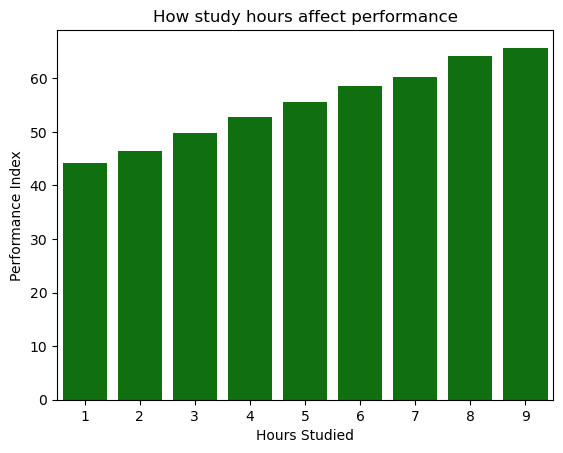

In [46]:
sns.barplot(x=hours_studied['Hours Studied'],y=hours_studied['Performance Index'],color='green')
plt.title('How study hours affect performance')
plt.show()

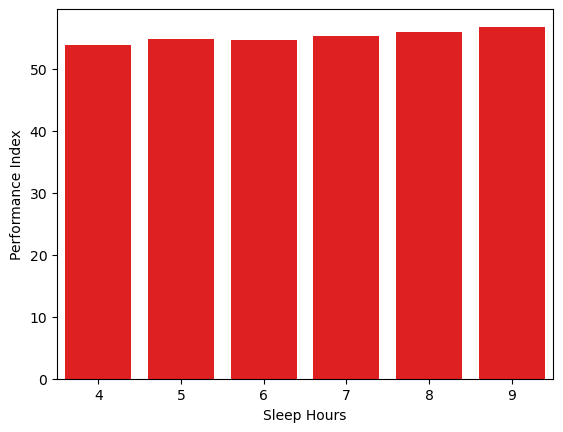

In [38]:
sns.barplot(x=performance['Sleep Hours'],y=performance['Performance Index'],color='red')
plt.show()

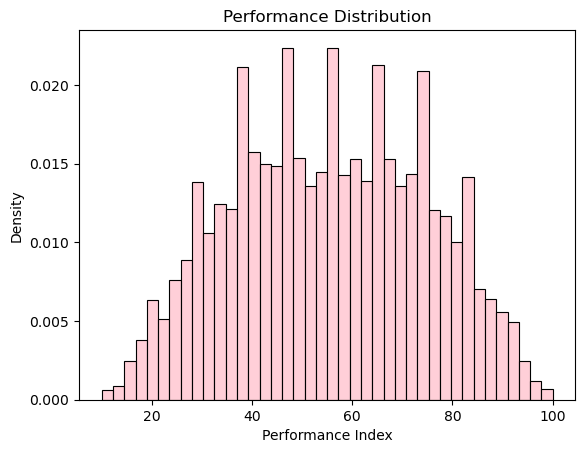

In [33]:
sns.histplot(x=df['Performance Index'],bins=40,stat='density',color='pink')
plt.title('Performance Distribution')
plt.show()

In [47]:
df.groupby(['Hours Studied','Extracurricular Activities'])['Performance Index'].mean().reset_index()

,Hours Studied,Extracurricular Activities,Performance Index
0,1,No,43.201342
1,1,Yes,45.097122
2,2,No,46.507993
3,2,Yes,46.342912
4,3,No,49.304114
5,3,Yes,50.248214
6,4,No,53.272059
7,4,Yes,52.164510
8,5,No,55.274254
9,5,Yes,55.749104


In [57]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].str.lower().str.strip().map({'yes':1, 'no':0})

In [ ]:

x = df.drop('Performance Index',axis=1)
y=df['Performance Index']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE:",mse,'\n',"r2:",r2)

MSE: 4.082628398521853 
 r2: 0.9889832909573145


The model explains about 99% of the variance, and the average prediction error is around 2 units, which suggests a very strong fit

In [66]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)
y_pred = lasso_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse,r2)


4.877609290690738 0.986838086366397


In [68]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)
y_pred = ridge_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse,r2)

4.082638193083 0.9889832645273239


Linear and Ridge regression achieve nearly identical performance, indicating limited multicollinearity and minimal overfitting. Feature selection is not required for this dataset, as most predictors are informative; consequently, Lasso with α = 1 over-regularises by removing useful features, leading to a slight decline in model performance rather than an improvement.

In [70]:
e_model = ElasticNet(alpha=1.0,l1_ratio=0.5)
e_model.fit(x_train,y_train)
y_pred = e_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse,r2)

4.878129999104697 0.9868366812683738


Elastic Net mirrors Lasso’s reduced performance, suggesting that feature sparsity is not beneficial for this dataset.